<a href="https://colab.research.google.com/github/Davidossec/Davidossec/blob/main/Introducci%C3%B3n_a_Paquetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Veámos lo que podríamos realizar con diferentes paquetes!

Importaremos los paquetes y nos conectaremos a google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

Creamos un Dataframe con los datos. Para este caso, utilizaremos un dataset sobre críticas de videojuegos utilizando Pandas(metacritic)

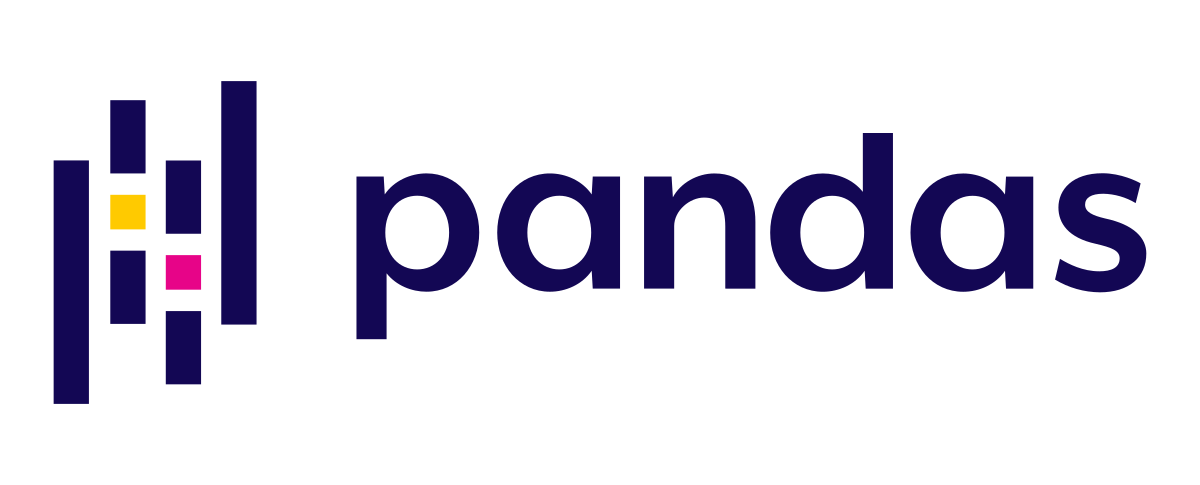

#*Pandas* es una librería en Python que se especializa en el manejo, análisis y procesamiento de datos. Su funcionalidad se basa en estructuras de datos como DataFrames y Series, que representan datos en forma de filas y columnas. En otras palabras, un DataFrame es similar a una hoja de Excel.

In [3]:
games_df = pd.read_csv('/content/drive/MyDrive/Proyectos/Introducción a paquetes/all_games.csv')
games_df.head(10)

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9
5,Super Mario Galaxy,Wii,"November 12, 2007",[Metacritic's 2007 Wii Game of the Year] The u...,97,9.1
6,Super Mario Galaxy 2,Wii,"May 23, 2010","Super Mario Galaxy 2, the sequel to the galaxy...",97,9.1
7,Red Dead Redemption 2,Xbox One,"October 26, 2018",Developed by the creators of Grand Theft Auto ...,97,8.0
8,Grand Theft Auto V,Xbox One,"November 18, 2014",Grand Theft Auto 5 melds storytelling and game...,97,7.9
9,Grand Theft Auto V,PlayStation 3,"September 17, 2013","Los Santos is a vast, sun-soaked metropolis fu...",97,8.3


In [4]:
games_df.tail(10)

,name,platform,release_date,summary,meta_score,user_review
18790,Fighter Within,Xbox One,"November 19, 2013",Unleash your inner fighter to beat your friend...,23,2.8
18791,FlatOut 3: Chaos & Destruction,PC,"December 13, 2011",FlatOut 3: Chaos & Destruction brings a new di...,23,3.0
18792,Homie Rollerz,DS,"March 5, 2008","Homie Rollerz is a fast-paced, mayhem-laden ka...",23,3.0
18793,Charlie's Angels,GameCube,"July 9, 2003","Join Natalie, Dylan, and Alex for an intense a...",23,4.3
18794,Rambo: The Video Game,PlayStation 3,"April 29, 2014",RAMBO The Vidoegame puts players in Rambo’s co...,23,1.8
18795,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",Fast & Furious: Showdown takes some of the fra...,22,1.3
18796,Drake of the 99 Dragons,Xbox,"November 3, 2003",Drake is out for revenge in a supernatural Hon...,22,1.7
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by...",21,2.9
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012","(Formerly known as ""The War Z"") It has been 5 ...",20,1.7
18799,Leisure Suit Larry: Box Office Bust,PC,"March 31, 2009",The Leisure Suit Larry: Box Office Bust video ...,20,2.0


In [5]:
games_df.shape

(18800, 6)

Revisemos el tipo de dato que tenemos en este dataframe

In [6]:
games_df.dtypes
#También puede ser
#games_df.info()

name            object
platform        object
release_date    object
summary         object
meta_score       int64
user_review     object
dtype: object

Algo interesante es que tanto user_review no es un número y release date no es una fecha. Lo veremos más adelante

#Valores perdidos y duplicados: manejaremos y visualizaremos estos datos con dos paquetes: Pandas y Missingno(para revisar los valores faltantes)

In [7]:
#Para valores nulos
games_df.isnull().sum()
#o games_df.isna().sum()

name              0
platform          0
release_date      0
summary         114
meta_score        0
user_review       0
dtype: int64

In [8]:
games_df.duplicated().sum()
#No hay duplicados

0

In [9]:
games_df

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9
...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",Fast & Furious: Showdown takes some of the fra...,22,1.3
18796,Drake of the 99 Dragons,Xbox,"November 3, 2003",Drake is out for revenge in a supernatural Hon...,22,1.7
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by...",21,2.9
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012","(Formerly known as ""The War Z"") It has been 5 ...",20,1.7


Algo que pasa en metacritic es que algunas veces, las notas inexistentes se muestran como "tbd".
¡Veamos qué tal!

In [10]:
games_with_tbd = games_df[games_df['user_review'] == 'tbd']
games_with_tbd

,name,platform,release_date,summary,meta_score,user_review
679,Synth Riders,PlayStation 4,"August 10, 2021",Synth Riders is your freestyle dancing VR rhyt...,89,tbd
963,Tiger Woods PGA Tour 2005,GameCube,"September 20, 2004",Challenge professional golfer Tiger Woods to c...,88,tbd
1277,NASCAR 2005: Chase for the Cup,Xbox,"August 31, 2004",Do you have what it takes to be a top NASCAR d...,86,tbd
1472,Moto Racer Advance,Game Boy Advance,"December 5, 2002",NaN,86,tbd
2098,Mushihimesama,Switch,"June 15, 2021",Mushihimesama (Bug Princess in English) is a v...,84,tbd
...,...,...,...,...,...,...
18594,Air Conflicts: Aces of World War II,PSP,"April 14, 2009",Air Conflicts is an arcade flight simulator ga...,36,tbd
18639,King of Clubs,Wii,"August 4, 2008","Never the same game twice, this absorbing and ...",35,tbd
18700,Jenga World Tour,DS,"November 13, 2007",Jenga is based on the world famous wooden bloc...,32,tbd
18715,Dream Chronicles,PlayStation 3,"November 23, 2010",Unlock the secrets of the beautiful and myster...,31,tbd


Efectivamente, trabajaremos con estos tbd y también con las fechas